# Курс аналитик данных на Python
## Модуль 6.3 ЦПТ и общая механика доверительных интервалов

In [35]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
%matplotlib inline

## Частный случай центральной предельной теоремы

Если  - X1,X2,...,Xn независимые случайные величины, имеющие один и тот же закон распределения 
с математическим ожиданием EX и дисперсией DX, то при неограниченном увеличении  закон распределения суммы

<center><img src="../img/blabla.gif" alt="lokh" width="100"></center>

неограниченно приближается к нормальному.

Применим эту логику в выборочному среднему X_mean =(x1+x2+…+xn)/n. Это тоже случайная величина, она каждый раз меняется, когда мы создаём новую выборку, в отличие от EX, которая не меняется.

Закон больших чисел учит нас, что если n достаточно большое, то X_mean становится близко к EX. Чем больше n, тем меньше отклонение

In [36]:
df = pd.read_csv('../data/insurance.csv')

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


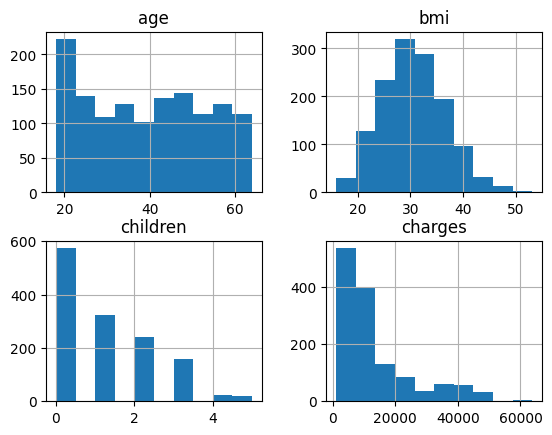

In [38]:
df.hist();

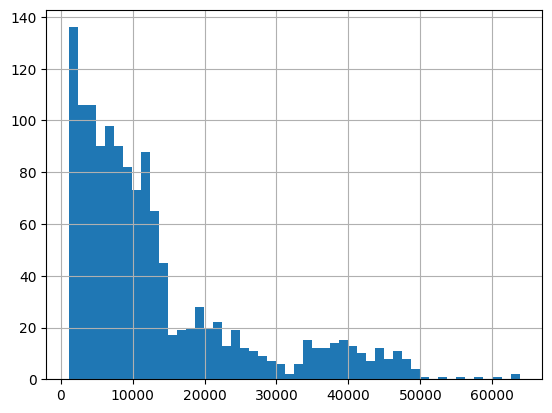

In [39]:
df['charges'].hist(bins=50);

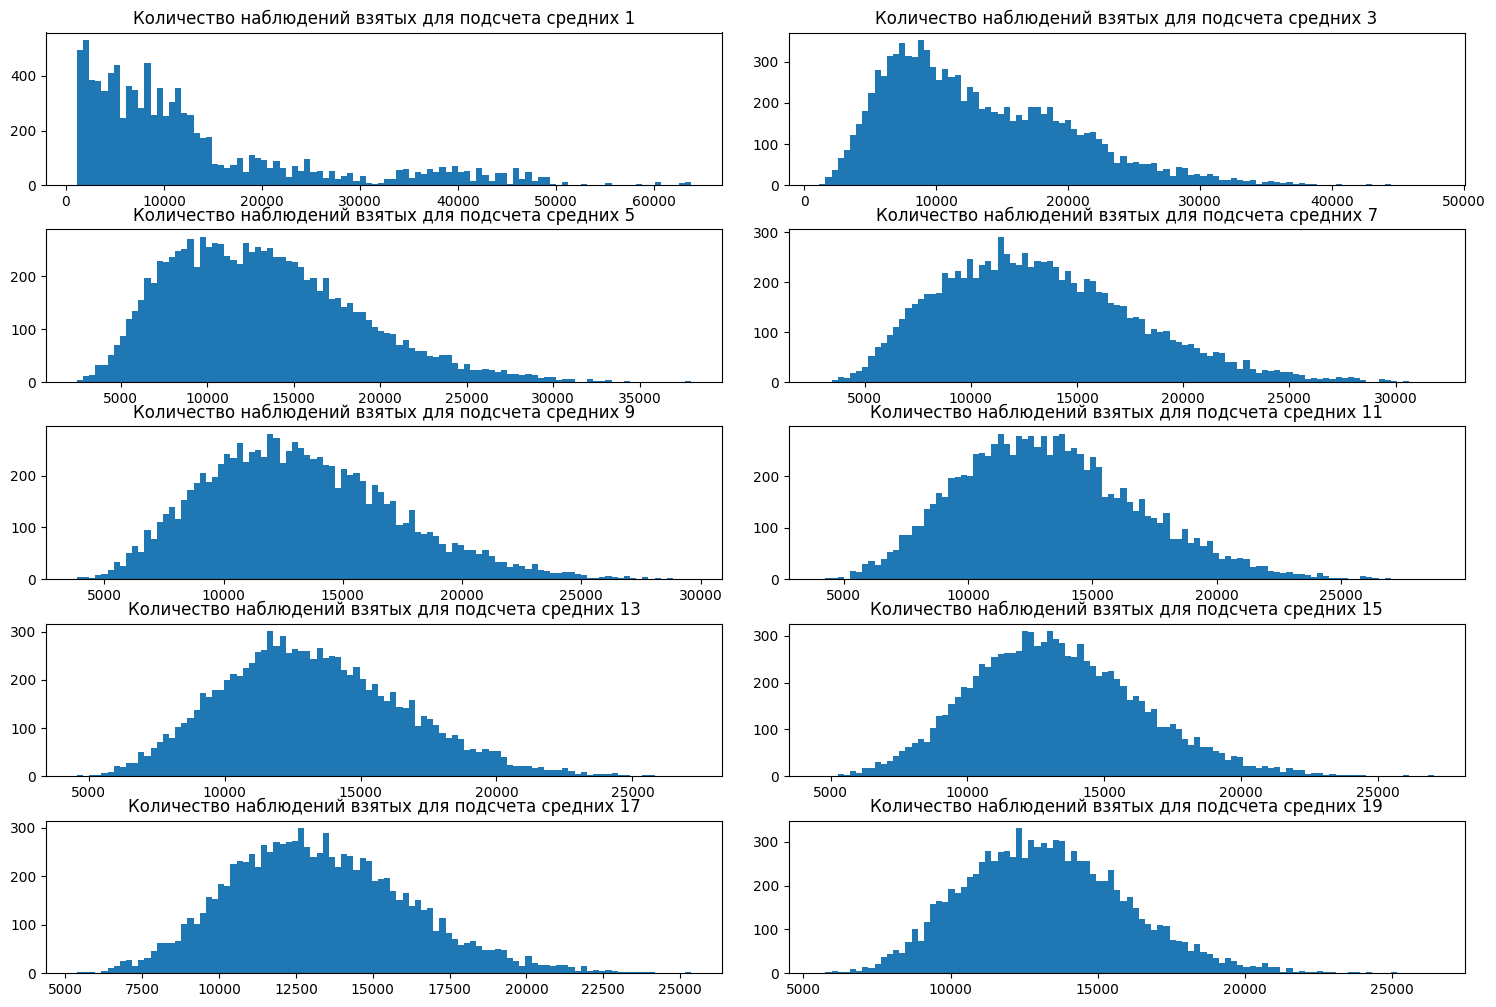

In [40]:
arr = np.arange(1,20,2)  # Массив количества наблюдений

fig, ax = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(15, 10)
fig.tight_layout()
i=0
for row in ax:
    for col in row:
        data = np.random.choice(
            df['charges'].values,
            size=(10000,arr[i]),
            replace=True).mean(axis=1)
            
        col.hist(data,bins=100)
        col.set_title(f'Количество наблюдений взятых для подсчета средних {arr[i]}')
        i+=1

## Доверительные интервалы

Они нужны для того чтобы понимать в пределах какого интервала может варьироваться наша выборочная оценка, так как она случайна и только приближается к истиной оценке распределения.<br>
Интервальная оценка истиного значения theta это числовой интервал (theta1,theta2), который с заданной вероятностью накрывает неизвестное значение параметра theta.

<center><img src="../img/thera.png" alt="lokh" width="300"></center>

Важно понимать что границы интервала это случайные величины а истиное значение нет.
Величина доверительного интервала зависит от величины выборки n (чем больше n тем уже интервал), от доверительной вероятности (1-a) (чем больше доверительная вероятность тем шире интервал)

А за счет ЦПТ мы можем строить доверительные интервалы для средних из не сильно скошенных относительно нормального распределения выборок
<center><img src="../img/x_mean_norm.png" alt="lokh" width="200"></center>
Одной и той же формулой:
<center><img src="../img/intervals_formula.png" alt="lokh" width="500"></center>
Но как вы заметили в этой формуле присутствует DX, которую мы по факту не знаем, для этого мы заменяем ее на лучшую оценку - выборочную дисперсию и тогда используем t статистику из распределения Стьюдента вместо Z статистики. Получаем по итогу вот такую формулу которой будем пользоваться для интервальных оценок средних.

$$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [41]:
from statsmodels.stats.weightstats import _tconfint_generic

In [42]:
female = df[df['sex'] == 'female']['charges']
male = df[df['sex'] == 'male']['charges']

In [43]:
female.shape, male.shape

((662,), (676,))

In [44]:
male.mean(), female.mean()

(13956.751177721893, 12569.578843835347)

Возьмем подвыборку из выборки

In [45]:
mini_sample = np.random.choice(male,size=200)

In [46]:
mini_sample.mean()

13840.22002875

Получили другую среднюю, хотя это по сути в рамках статистики обе этих выборки - выборки, и они равноправны, вот для того чтобы оценивать в каких пределах может варьироваться выборочная средняя и нужна интервальная оценка.

In [47]:
male_mean = male.mean()
male_mean_std = male.std()/sqrt(len(male))

female_mean = female.mean()
female_mean_std = female.std()/sqrt(len(female))
male_mean, male_mean_std, female_mean, female_mean_std

(13956.751177721893, 498.88561211627155, 12569.578843835347, 432.5293561601883)

Так же при проведении интервальной оценки нужно указать альтернативу, их 3 вида:
<ul>
    <li>меньше</li>
    <li>больше</li>
    <li>двусторонняя</li>
</ul>
Что все это значит? Лишь то что в случае с двусторонней альтернативой мы допускаем что истинное матожидание может быть как больше так и меньше чем полученная оценка, поскольку учитываем любую возможность, такой подход рекомендуется, поскольку редко есть уверенность заранее в направлении какого-либо различия, если таковое существует.

В некоторых случаях можно использовать одностороннюю альтернативу, но только тогда когда мы уверены в том что истинное матожидание
точно меньше или больше выборочной оценки.

В целом в быту можно использовать просто двустороннюю альтернативу, не ошибетесь.

In [48]:
from scipy.stats import t
t_stat = t.ppf(1 - 0.05/2,len(male) - 1)

male_mean - t_stat * male_mean_std, male_mean + t_stat * male_mean_std

(12977.196929471213, 14936.305425972574)

In [49]:
# Готовые функции
male_interval = _tconfint_generic(
    male_mean, 
    male_mean_std, 
    len(male) - 1,
    0.05,
    alternative='two-sided')
female_interval = _tconfint_generic(
    female_mean, 
    female_mean_std, 
    len(female) - 1,
    0.05,
    alternative='two-sided')
    # 0.05 - это 95% доверительный интервал

print('95% confidence interval for male: ',male_interval)
print('interval size for male: ', male_interval[1] - male_interval[0])

print('95% confidence interval for female ',female_interval)
print('interval size for male: ', female_interval[1] - female_interval[0])

95% confidence interval for male:  (12977.196929471213, 14936.305425972574)
interval size for male:  1959.1084965013615
95% confidence interval for female  (11720.28177548769, 13418.875912183003)
interval size for male:  1698.594136695312


В данном случае (при 90% доверительном интервале), нельзя делать вывод, что женщины в среднем тратят меньше, чем мужчины, так как доверительные интервалы пересекаются. 

Попробуем 80% доверительный интервал:

In [50]:
male_interval = _tconfint_generic(
    male_mean, 
    male_mean_std, 
    len(male) - 1,
    0.2,
    alternative='two-sided')
female_interval = _tconfint_generic(
    female_mean,
    female_mean_std, 
    len(female) - 1,
    0.2,
    alternative='two-sided')
    # 0.2 - это 80% доверительный интервал

print('80% confidence interval for male: ',male_interval)
print('interval size for male: ', male_interval[1] - male_interval[0])

print('80% confidence interval for female ',female_interval)
print('interval size for male: ', female_interval[1] - female_interval[0])

80% confidence interval for male:  (13316.777212809062, 14596.725142634725)
interval size for male:  1279.9479298256629
80% confidence interval for female  (12014.715636891246, 13124.442050779448)
interval size for male:  1109.726413888202


В данном случае можем утверждать, что женщины в среднем тратят меньше, потому что доверительный интервал лежит полностью "левее"